# Regression Exercises

## Linear

In [ ]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]
x_bedroom = data_array[:,1]

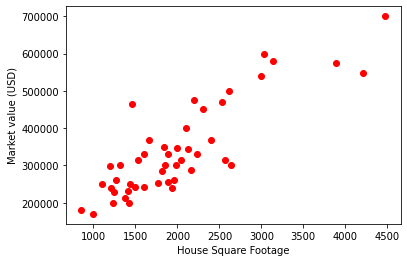

In [ ]:
plt.plot(x_sqft, y_value, 'ro'); plt.xlabel("House Square Footage"); plt.ylabel("Market value (USD)");

Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [ ]:
import sklearn.linear_model as lm
from statistics import mean
import numpy as np

def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
    # YOUR CODE HERE

    m = (((mean(xx)*mean(yy)) - mean(xx*yy)) /
         ((mean(xx)*mean(xx)) - mean(xx*xx)))
    
    b = mean(yy) - m*mean(xx)
    
    return m, b

In [ ]:
# Use your function to show the best fit values for our data


m, b = find_best_fit(x_sqft, y_value)
# fit_str = 'y = {aa:.1f}x + {bb:.1f}'
# print(fit_str.format(aa=mm,bb=bb))

print(m, b)

134.52528772024135 71270.49244872906


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

<ipython-input-104-0760a41b22d3>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_sqft, y_value, 'ro',c='g'); plt.xlabel("House Square Footage"); plt.ylabel("Market value (USD)");


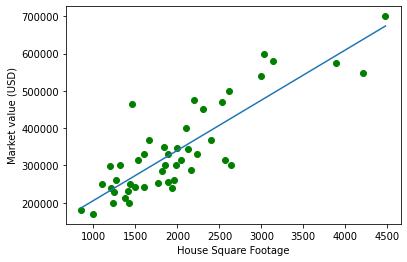

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Plot the data

plt.plot(x_sqft, y_value, 'ro',c='g'); plt.xlabel("House Square Footage"); plt.ylabel("Market value (USD)");

sqft_min = x_sqft.min()
sqft_max = x_sqft.max()

x_line_vals = np.linspace(sqft_min, sqft_max, 20)
y_line_vals = (x_line_vals)*m+b
house_price = plt.plot(x_line_vals, y_line_vals)

# Sample the range from minimum to maximum sqft to get 100 points
# np.random.choice(data_array, 100)
# sample_data = data_array

# sample.curves(curves, ptsPerCurve = as.integer(c(500)))
# Apply the best fit equation to each sample point and plot the result

# best_fit = find_best_fit(x_sqft, y_value)

1: Given these parameters, how much should a house with 1600 sqft cost?

Around 280,000

2: From the dataset, how much did a house with 1600 sqft actually cost?

329,900

3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

329,900-280,000 = 49,900
100 * 49900/329900 = 15.13%

Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [ ]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",m,b)

Sklearn: 134.52528772 71270.492448729
My function: 134.52528772024135 71270.49244872906


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

0.7310037839755306
0.1955948956534046
<ipython-input-117-5f6ca89021e6>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_bedroom, y_value, 'ro',c='g'); plt.xlabel("Number of Bedrooms"); plt.ylabel("Market value (USD)");


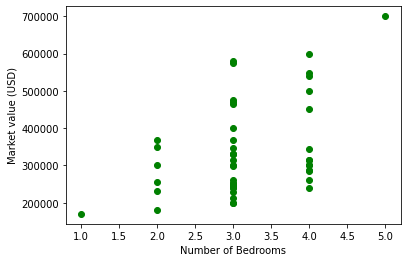

In [ ]:
import sklearn.linear_model as lm

# Create a linear regression model
model = lm.LinearRegression()

# Reshape the data to the required format for lm's fit function
# We have to reshape the data into a column list like [[3],[3],[3]...] instead of [3, 3, 3,...]

# Fit onto the results
house_sqft = model.fit(x_sqft_shaped,y_value)

x_sqft_shaped = x_sqft.reshape(-1,1)

x_bedroom_shaped = x_bedroom.reshape(-1,1)

print(house_sqft.score(x_sqft_shaped,y_value))
# YOUR CODE HERE

house_bedrooms = model.fit(x_bedroom_shaped, y_value)

print(house_bedrooms.score(x_bedroom_shaped,y_value))

plt.plot(x_bedroom, y_value, 'ro',c='g'); plt.xlabel("Number of Bedrooms"); plt.ylabel("Market value (USD)");


Do 2 variables have to be verry correlated to reduce their effectiveness together?

No, it depends on the types of data that you're looking at. The price and the square footage are very correlated but are efficient in giving you information about that relation. The bedrooms and price have less linear correlation but this information has a different kind of correlation that gives additional information. 

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on sklearn's breast cancer dataset. It is up to you to decide what features to get the best results.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

print(data['data'].shape)

X_cols = data.data
Y_cols = data.target

# YOUR CODE HERE

train_size = 0.5

X_train, X_val, y_train, y_val = train_test_split(X_cols, Y_cols, train_size = train_size, random_state=1)

(569, 30)


Test your logistical regression! You must get an accuracy of > 80%

In [ ]:
from sklearn.metrics import accuracy_score

# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred=logreg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=logreg.predict(X_val)


print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  97.53521126760563
Validation Accuracy is  90.52631578947368
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f01bcab1-9435-41e1-8df0-9751f165b00c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>